## Simple Custom Rule

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def custom_rule(grid, x, y):
    """Custom rule for state transition."""
    neighbors = grid[x-1:x+2, y-1:y+2].sum() - grid[x, y]
    if grid[x, y] == 1:  # Alive
        return 1 if neighbors in [2, 3] else 0
    else:  # Dead
        return 1 if neighbors == 3 else 0

def apply_custom_rule(grid, steps):
    """Applies the custom rule over multiple steps."""
    rows, cols = grid.shape
    grids = [grid]  # Store initial grid
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_rule(grid, x, y)
        grid = new_grid
        grids.append(grid)  # Store grid at each step
    return grids

# Initial grid
grid = np.zeros((20, 20), dtype=int)
grid[9, 9] = grid[9, 10] = grid[9, 11] = grid[10, 10] = 1  # Glider-like structure

# Number of steps for the simulation
num_steps = 10

# Get the grid states for each step
grids = apply_custom_rule(grid, num_steps)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to update the plot for each frame
def animate(i):
    ax.clear()
    ax.imshow(grids[i], cmap='binary', interpolation='none')  # Display the grid
    ax.set_title(f'Time Step {i+1}')
    ax.set_xlabel('Position on Grid')
    ax.set_yticks([])  # Remove y-ticks for cleaner visualization

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=500)  # 500ms interval between frames

# Display the animation inline in the notebook
plt.close()  # Close the plot to avoid duplicate display
HTML(anim.to_jshtml())


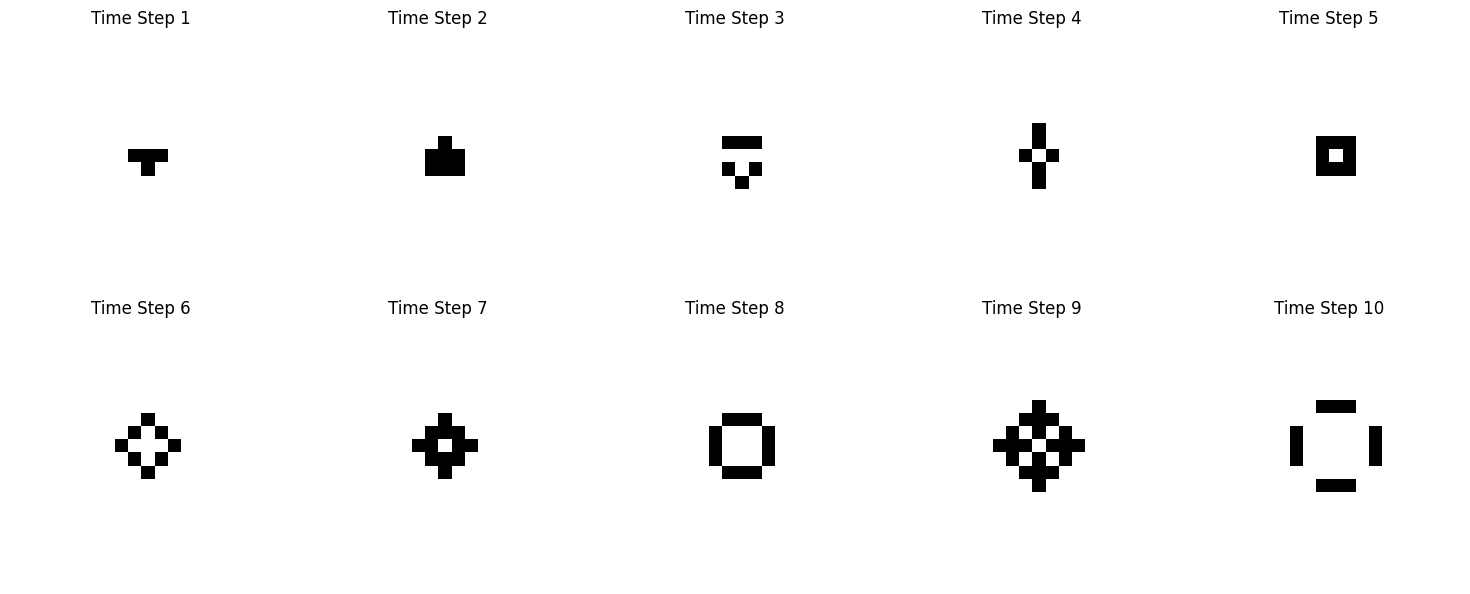

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def custom_rule(grid, x, y):
    """Custom rule for state transition."""
    neighbors = grid[x-1:x+2, y-1:y+2].sum() - grid[x, y]
    if grid[x, y] == 1:  # Alive
        return 1 if neighbors in [2, 3] else 0
    else:  # Dead
        return 1 if neighbors == 3 else 0

def apply_custom_rule(grid, steps):
    """Applies the custom rule over multiple steps."""
    rows, cols = grid.shape
    grids = [grid]  # Store initial grid
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_rule(grid, x, y)
        grid = new_grid
        grids.append(grid)  # Store grid at each step
    return grids

# Initial grid
grid = np.zeros((20, 20), dtype=int)
grid[9, 9] = grid[9, 10] = grid[9, 11] = grid[10, 10] = 1  # Glider-like structure

# Number of steps for the simulation
num_steps = 10

# Get the grid states for each step
grids = apply_custom_rule(grid, num_steps)

# Set up the subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Adjust layout based on number of steps
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Display each grid in a subplot
for i in range(num_steps):
    axs[i].imshow(grids[i], cmap='binary', interpolation='none')
    axs[i].set_title(f'Time Step {i+1}')
    axs[i].axis('off')  # Hide axis for clarity

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Forest fire model

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def custom_fire_rule(grid, x, y):
    """Custom rule for fire spread in a forest."""
    if grid[x, y] == 2:  # Burning tree
        return 0  # It burns out and becomes empty
    elif grid[x, y] == 1:  # Tree
        # A tree catches fire if one of its neighbors is burning
        neighbors = grid[x-1:x+2, y-1:y+2]  # 3x3 grid around the cell
        if np.any(neighbors == 2):  # Check if any neighboring cell is burning
            return 2  # The tree catches fire
    return grid[x, y]  # Otherwise, the state stays the same (empty or tree)

def apply_fire_rule(grid, steps):
    """Applies the custom fire spread rule over multiple steps."""
    rows, cols = grid.shape
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_fire_rule(grid, x, y)
        grid = new_grid
        yield grid

# Initialize a larger forest grid (40x40)
forest = np.zeros((40, 40), dtype=int)

# Increase the probability of trees to 0.8 (80% of cells will be trees)
np.random.seed(42)  # For reproducibility
forest = np.random.choice([0, 1], size=(40, 40), p=[0.2, 0.8])  # 80% trees, 20% empty cells

# Set an initial fire at the center
forest[20, 20] = 2  # Starting fire at the center of the forest

# Number of steps for the simulation
num_steps = 20

# Get the state of the forest over multiple time steps
forest_states = list(apply_fire_rule(forest, steps=num_steps))

# Set up the subplots for displaying the simulation steps
fig, ax = plt.subplots(figsize=(12, 12))  # Adjusted size for the larger grid

def animate_fire(i):
    """Animate the forest fire spread."""
    ax.clear()  # Clear the axis for the next step
    ax.imshow(forest_states[i], cmap='YlOrRd', interpolation='none')  # Display the forest grid
    ax.set_title(f'Time Step {i+1}')
    ax.axis('off')  # Turn off the axis

# Create the animation
anim = animation.FuncAnimation(fig, animate_fire, frames=len(forest_states), interval=500)

# Display the animation in Jupyter Notebook
plt.close()  # Close the plot to prevent duplicate display
HTML(anim.to_jshtml())


In [14]:
def initialize_3d_grid(size):
    """Initializes a 3D grid."""
    grid = np.zeros((size, size, size), dtype=int)
    grid[size//2, size//2, size//2] = 1  # Activate the center
    return grid

def apply_3d_rule(grid, steps):
    """Applies a 3D rule over multiple steps."""
    size = grid.shape[0]
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, size-1):
            for y in range(1, size-1):
                for z in range(1, size-1):
                    neighbors = grid[x-1:x+2, y-1:y+2, z-1:z+2].sum() - grid[x, y, z]
                    new_grid[x, y, z] = 1 if neighbors in [4, 5] else 0
        grid = new_grid
        yield grid

# Initialize and simulate
grid = initialize_3d_grid(size=20)
for step, g in enumerate(apply_3d_rule(grid, steps=3)):
    print(f"Step {step + 1}: Total Active Cells = {np.sum(g)}")

Step 1: Total Active Cells = 0
Step 2: Total Active Cells = 0
Step 3: Total Active Cells = 0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def custom_fire_rule(grid, x, y):
    """Custom rule for fire spread in a forest."""
    if grid[x, y] == 2:  # Burning tree
        return 0  # It burns out and becomes empty
    elif grid[x, y] == 1:  # Tree
        # A tree catches fire if one of its neighbors is burning
        neighbors = grid[x-1:x+2, y-1:y+2]  # 3x3 grid around the cell
        if np.any(neighbors == 2):  # Check if any neighboring cell is burning
            return 2  # The tree catches fire
    return grid[x, y]  # Otherwise, the state stays the same (empty or tree)

def apply_fire_rule(grid, steps):
    """Applies the custom fire spread rule over multiple steps."""
    rows, cols = grid.shape
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_fire_rule(grid, x, y)
        grid = new_grid
        yield grid

# Initialize a larger forest grid (40x40)
forest = np.zeros((40, 40), dtype=int)

# Increase the probability of trees to 0.8 (80% of cells will be trees)
np.random.seed(42)  # For reproducibility
forest = np.random.choice([0, 1], size=(40, 40), p=[0.2, 0.8])  # 80% trees, 20% empty cells

# Set an initial fire at the center
forest[20, 20] = 2  # Starting fire at the center of the forest

# Number of steps for the simulation
num_steps = 20

# Get the state of the forest over multiple time steps
forest_states = list(apply_fire_rule(forest, steps=num_steps))

# Set up the subplots for displaying the simulation steps
fig, ax = plt.subplots(figsize=(12, 12))  # Adjusted size for the larger grid

def animate_fire(i):
    """Animate the forest fire spread."""
    ax.clear()  # Clear the axis for the next step
    ax.imshow(forest_states[i], cmap='YlOrRd', interpolation='none')  # Display the forest grid
    ax.set_title(f'Time Step {i+1}')
    ax.axis('off')  # Turn off the axis

# Create the animation
anim = animation.FuncAnimation(fig, animate_fire, frames=len(forest_states), interval=500)

# Save the animation as a GIF
gif_filename = "forest_fire_simulation.gif"
anim.save(gif_filename, writer="pillow", fps=2)  # Adjust FPS as needed

# Display the animation in Jupyter Notebook
plt.close()  # Close the plot to prevent duplicate display
HTML(anim.to_jshtml())


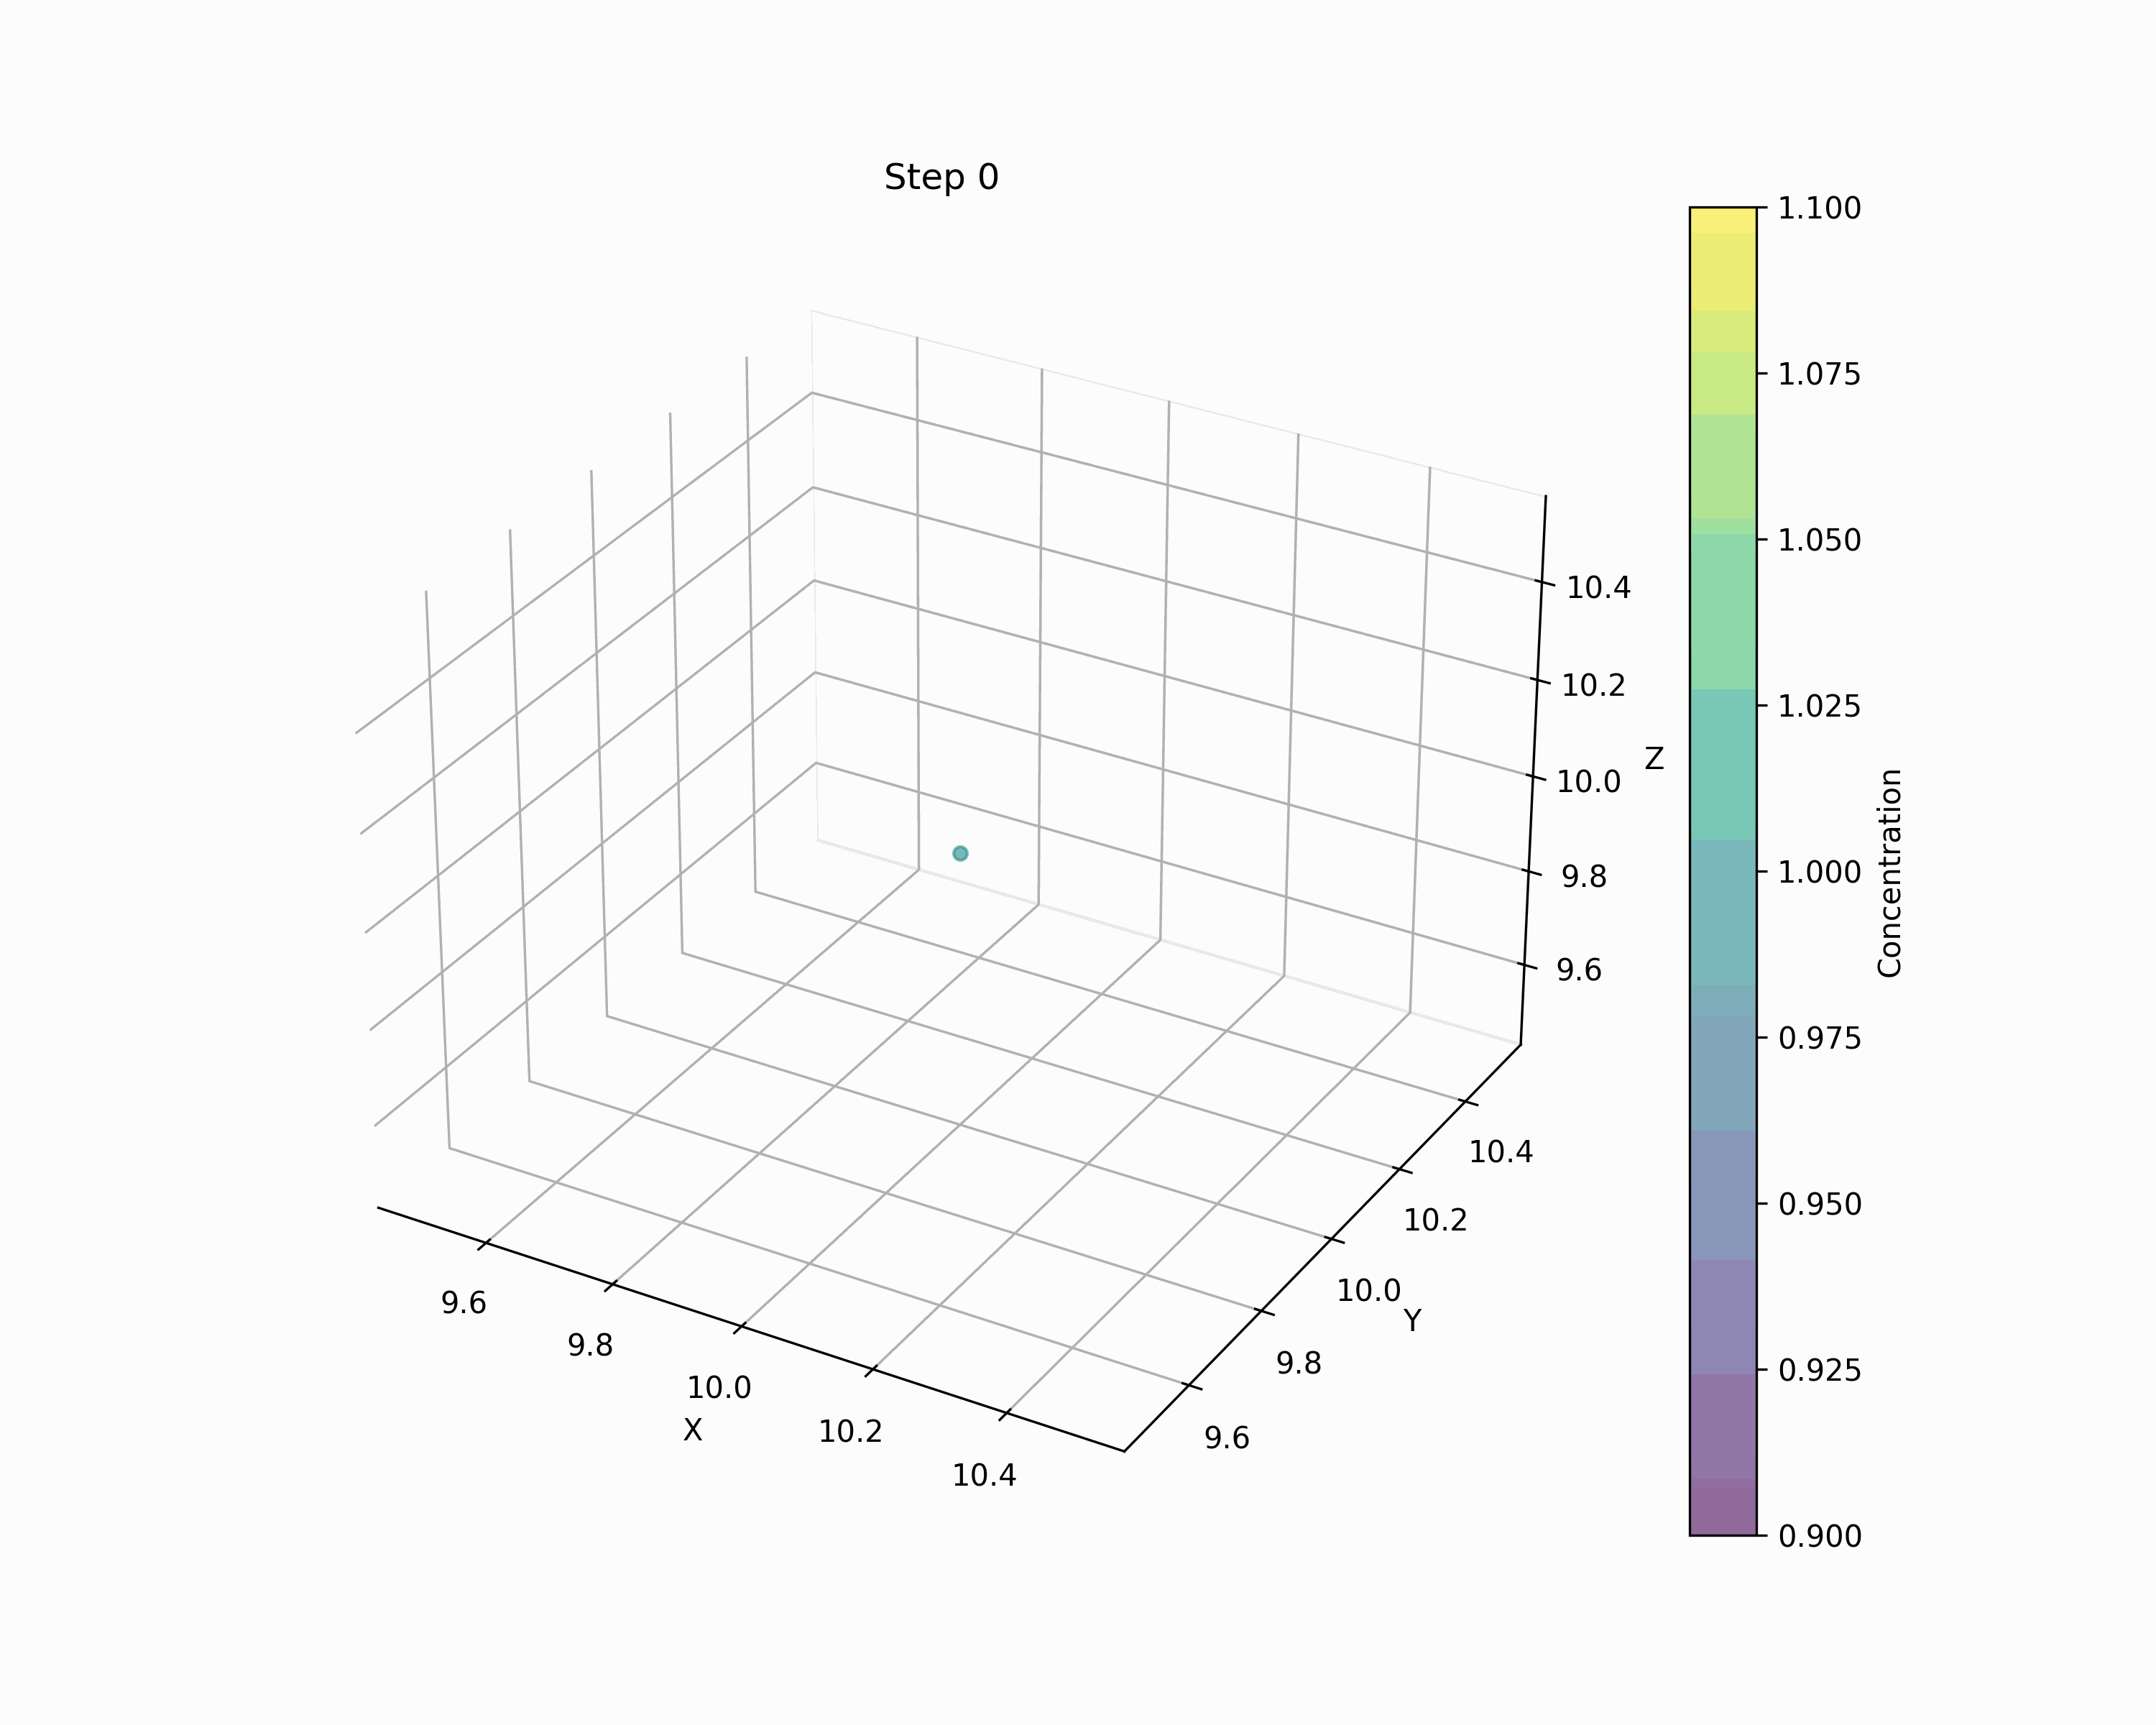

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

def initialize_grid_3d(size, concentration=1.0):
    """
    Initializes a 3D grid with a localized concentration in the center.
    """
    grid = np.zeros((size, size, size))
    center = size // 2
    grid[center, center, center] = concentration
    return grid

def diffusion_rule(grid, diffusion_rate=0.1):
    """
    Applies a simple diffusion rule to the 3D grid.
    Each cell exchanges a fraction of its concentration with its neighbors.
    """
    new_grid = grid.copy()
    size = grid.shape[0]
    
    for x in range(1, size - 1):
        for y in range(1, size - 1):
            for z in range(1, size - 1):
                # Compute the average concentration of neighbors
                neighbors = (
                    grid[x-1, y, z] + grid[x+1, y, z] +
                    grid[x, y-1, z] + grid[x, y+1, z] +
                    grid[x, y, z-1] + grid[x, y, z+1]
                ) / 6.0
                
                # Update the cell concentration
                new_grid[x, y, z] += diffusion_rate * (neighbors - grid[x, y, z])
    
    return new_grid

def simulate_diffusion(grid, steps, diffusion_rate=0.1):
    """
    Simulates the diffusion process over a number of time steps.
    """
    states = [grid]
    for _ in range(steps):
        grid = diffusion_rule(grid, diffusion_rate)
        states.append(grid)
    return states

def visualize_diffusion_step(grid, step, save_path=None):
    """
    Visualizes a single step of the 3D diffusion grid as a scatter plot.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    size = grid.shape[0]
    x, y, z = np.meshgrid(np.arange(size), np.arange(size), np.arange(size), indexing='ij')
    concentrations = grid.flatten()
    
    # Use only non-zero points for visualization
    nonzero_indices = concentrations > 0
    sc = ax.scatter(x.flatten()[nonzero_indices],
                    y.flatten()[nonzero_indices],
                    z.flatten()[nonzero_indices],
                    c=concentrations[nonzero_indices],
                    cmap='viridis', alpha=0.6)
    
    ax.set_title(f"Step {step}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.colorbar(sc, ax=ax, label="Concentration")
    
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.close(fig)

# Parameters
grid_size = 20
time_steps = 10
diffusion_rate = 0.1

# Initialize grid and simulate
initial_grid = initialize_grid_3d(size=grid_size, concentration=1.0)
diffusion_states = simulate_diffusion(initial_grid, steps=time_steps, diffusion_rate=diffusion_rate)

# Save each step as an image for GIF creation
image_filenames = []
for step, state in enumerate(diffusion_states):
    filename = f"diffusion_step_{step}.png"
    visualize_diffusion_step(state, step, save_path=filename)
    image_filenames.append(filename)

# Create GIF from saved images
def create_gif(image_filenames, output_filename="diffusion_simulation.gif", fps=2):
    """
    Creates an animated GIF from a list of image filenames.
    """
    from PIL import Image
    images = [Image.open(filename) for filename in image_filenames]
    images[0].save(output_filename, save_all=True, append_images=images[1:], duration=1000 // fps, loop=0)

GIF_FILENAME = "diffusion_simulation.gif"

create_gif(image_filenames, output_filename=GIF_FILENAME, fps=2)

# Display the GIF in Jupyter Notebook
from IPython.display import Image
Image(filename=GIF_FILENAME)


C:\Users\ernan\AppData\Local\Temp\ipykernel_38840\3077000128.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd", 3)  # Define colors for the three states


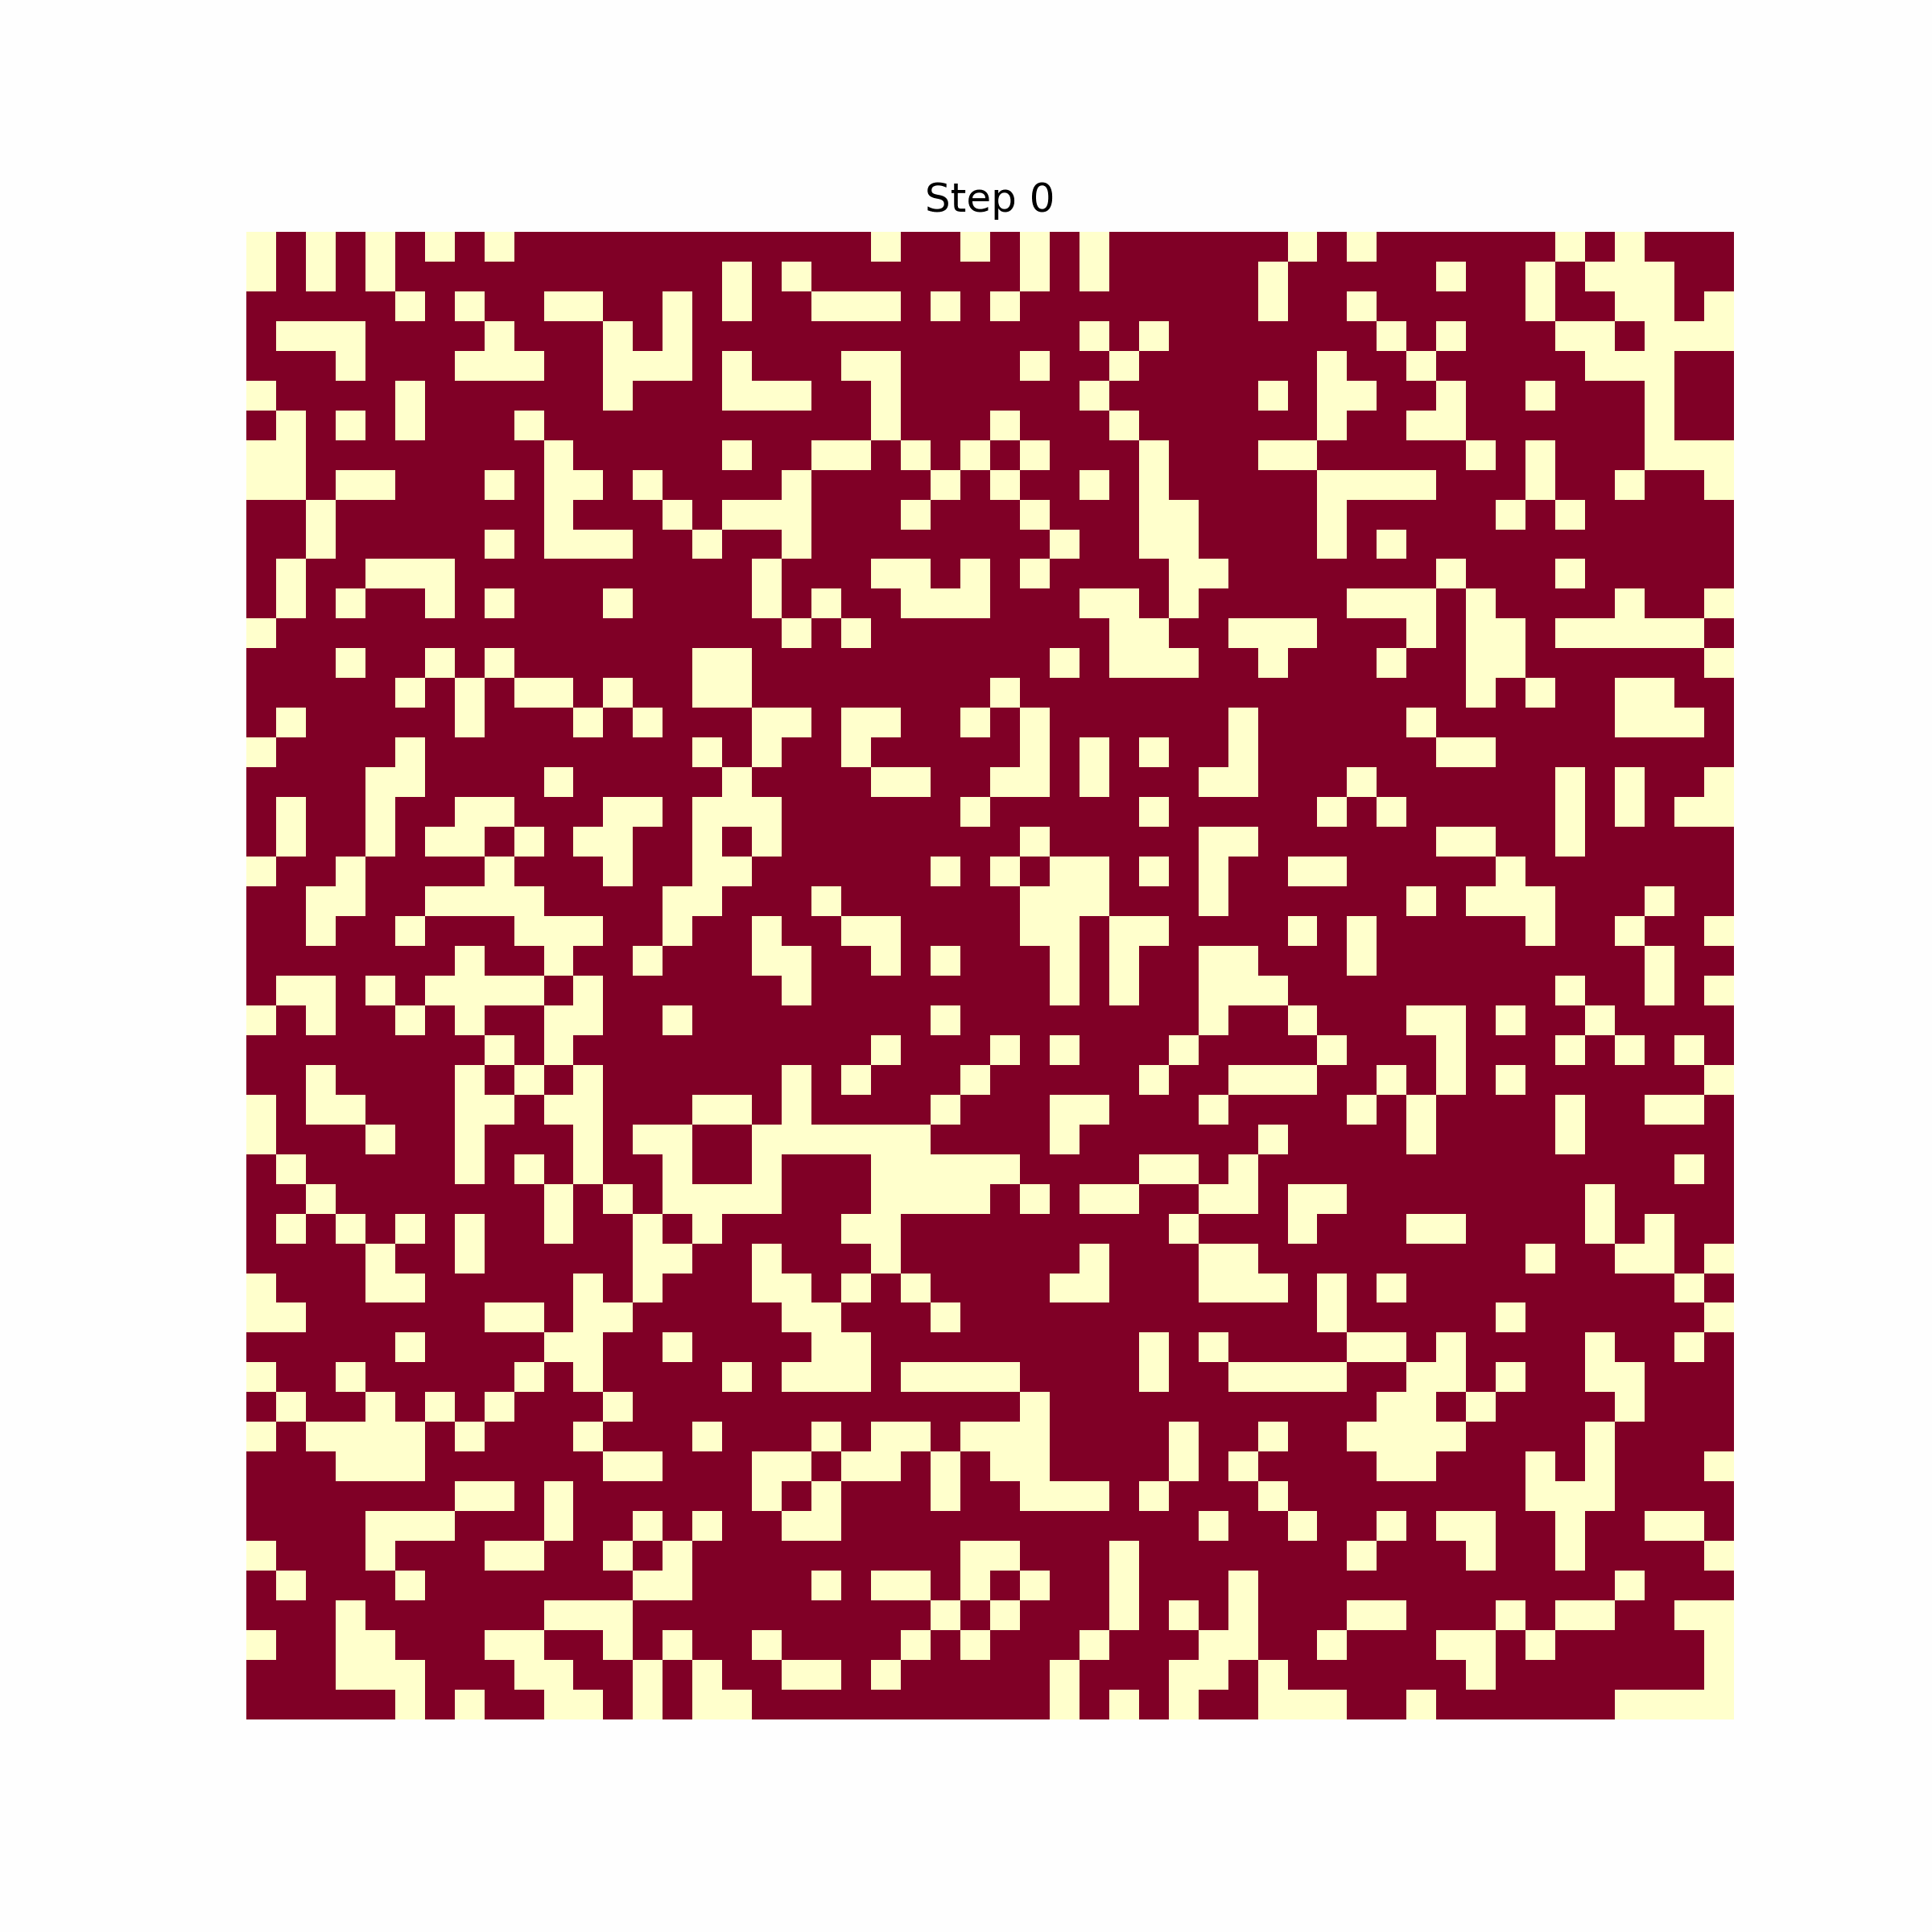

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def initialize_forest(size, tree_prob=0.6):
    """
    Initializes the forest grid with trees and empty spaces.
    `tree_prob` defines the probability of a cell being a tree.
    """
    return np.random.choice([0, 1], size=(size, size), p=[1 - tree_prob, tree_prob])

def stochastic_fire_rule(grid, prob_ignite=0.2, prob_spread=0.6):
    """
    Applies the stochastic fire spread rule to the grid.
    States:
      0 - Empty
      1 - Tree
      2 - Burning
    """
    new_grid = grid.copy()
    size = grid.shape[0]
    for x in range(1, size - 1):
        for y in range(1, size - 1):
            if grid[x, y] == 1:  # Tree
                # A tree ignites randomly with probability `prob_ignite`
                if np.random.rand() < prob_ignite:
                    new_grid[x, y] = 2
                # A tree catches fire if any neighbor is burning
                elif np.any(grid[x-1:x+2, y-1:y+2] == 2) and np.random.rand() < prob_spread:
                    new_grid[x, y] = 2
            elif grid[x, y] == 2:  # Burning tree
                # A burning tree becomes empty
                new_grid[x, y] = 0
    return new_grid

def simulate_fire(grid, steps, prob_ignite=0.2, prob_spread=0.6):
    """
    Simulates the stochastic forest fire over a number of steps.
    """
    states = [grid]
    for _ in range(steps):
        grid = stochastic_fire_rule(grid, prob_ignite, prob_spread)
        states.append(grid)
    return states

def visualize_fire_step(grid, step, save_path=None):
    """
    Visualizes a single step of the forest fire grid.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    cmap = plt.cm.get_cmap("YlOrRd", 3)  # Define colors for the three states
    ax.imshow(grid, cmap=cmap, interpolation="none")
    ax.set_title(f"Step {step}")
    ax.axis("off")
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.close(fig)

# Parameters
grid_size = 50
tree_prob = 0.7
time_steps = 20
prob_ignite = 0.02
prob_spread = 0.6

# Initialize the forest and simulate
forest = initialize_forest(grid_size, tree_prob=tree_prob)
forest_states = simulate_fire(forest, time_steps, prob_ignite=prob_ignite, prob_spread=prob_spread)

# Save images for visualization
image_filenames = []
for step, state in enumerate(forest_states):
    filename = f"forest_fire_step_{step}.png"
    visualize_fire_step(state, step, save_path=filename)
    image_filenames.append(filename)

# Create an animated GIF
def create_gif(image_filenames, output_filename="stochastic_forest_fire.gif", fps=2):
    """
    Creates an animated GIF from a list of image filenames.
    """
    from PIL import Image
    images = [Image.open(filename) for filename in image_filenames]
    images[0].save(output_filename, save_all=True, append_images=images[1:], duration=1000 // fps, loop=0)

create_gif(image_filenames, output_filename="stochastic_forest_fire.gif", fps=2)

# Display the GIF
from IPython.display import Image
Image(filename="stochastic_forest_fire.gif")
